# Implementing a simple regression model using Linear Regression.

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
df = pd.read_csv('weight_height.csv')

In [252]:
df.head()

,Weight,Height
0,40.000000,152.483571
1,40.606061,150.823830
2,43.030303,156.405073
3,43.636364,166.986973
4,44.242424,164.443234


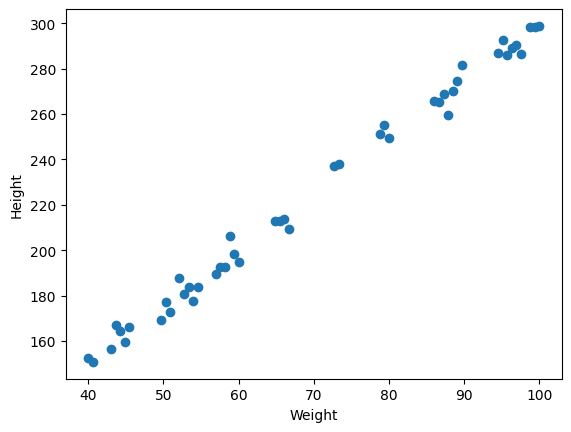

In [253]:
plt.scatter(x=df['Weight'], y=df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [254]:
# this shows pearson correlation
df.corr()

,Weight,Height
Weight,1.000000,0.996284
Height,0.996284,1.000000


In [255]:
import seaborn as sns

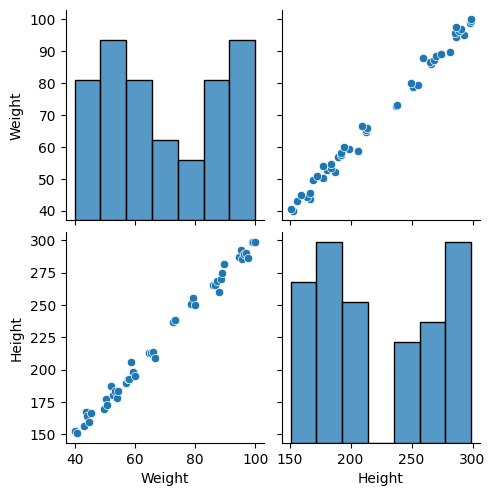

In [256]:
# this shows a linearly correlation for Height with respect to weight, so Linear regression can be applicable
sns.pairplot(df)

### Independent and dependent feature
#### Make sure Independent feature in Simple or Linear regression must be in dataframe or 2d array
#### Output feature should be a series or 1d array in Regression as we will just have a single output feature

In [257]:

x = df['Weight']
# this gives series , we need to make sure independent feature should be in dataframe or 2d array
print('Type : ', type(x))
print('Shape : ', x.shape)

Type :  <class 'pandas.core.series.Series'>
Shape :  (46,)


In [258]:
# independent feature in dataframe or 2d array, always make sure independent feature in simple or multiple linear regression
x = df[['Weight']]
x.shape

(46, 1)

In [259]:
# dependent or output feature, in series
y= df['Height']
type(y)

pandas.core.series.Series

### Train Test Split

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=2)

In [262]:
X_test.shape

(12, 1)

In [263]:
X_train.shape

(34, 1)

#### Apply `Standardization` with Z-score
#### `Z-score` - Mean 0 and std = 1 (The independent feature will be converted with all the values to mean 0 and std =1)

In [264]:
from sklearn.preprocessing import StandardScaler

In [265]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train[:5] #fist 5 items in array

array([[-0.66649456],
       [ 0.81418369],
       [ 0.10603323],
       [ 1.4901455 ],
       [ 0.49229712]])

#### Now we will only apply transform to X_Test dataset, this is becuase we dont want to make our model to know anything about my test data,that mean 0 and std=1. This concept is Data Leakage. 

In [266]:
X_test = scaler.transform(X_test)
X_test

array([[-0.24804201],
       [-0.92400382],
       [ 1.39357953],
       [-0.69868321],
       [ 0.97512698],
       [ 1.42576819],
       [ 1.52233416],
       [-0.89181516],
       [-0.8596265 ],
       [-1.63215428],
       [-1.471211  ],
       [-1.05275845]])

### Apply Simple Linear Regression
#### check sklearn simple linear regression - https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html

1. **"I have trained a regression model using scikit-learn's `LinearRegression` class with the given training data (`X_train` and `Y_train`)."**
2. **"The model's coefficients (slope) and intercept have been learned during training."**

In [267]:
from sklearn.linear_model import LinearRegression

In [268]:
regression = LinearRegression(n_jobs=1)

In [269]:
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=1)

In [270]:
print("Coefficient or Slope: ", regression.coef_) #this says one unit movement in the x value that is feature weight value there is 19.03 increase or movement in y value
print("Intercept : ", regression.intercept_)

Coefficient or Slope:  [46.70130606]
Intercept :  227.4521893058823


In [271]:
x_train_predicted = regression.predict(X_train)
x_train_predicted

array([196.32602301, 265.47563108, 232.4040794 , 297.04393043,
       250.44310759, 247.4366029 , 152.73170489, 217.37155591,
       269.98538814, 288.02441632, 199.3325277 , 274.49514519,
       181.29349951, 161.75121897, 164.75772366, 160.24796663,
       289.52766868, 163.25447133, 268.48213578, 248.93985523,
       200.83578006, 233.90733174, 286.52116399, 212.86179886,
       300.05043512, 266.97888344, 271.48864047, 175.28049013,
       182.79675187, 197.82927537, 214.36505119, 176.78374246,
       193.31951831, 291.03092102])

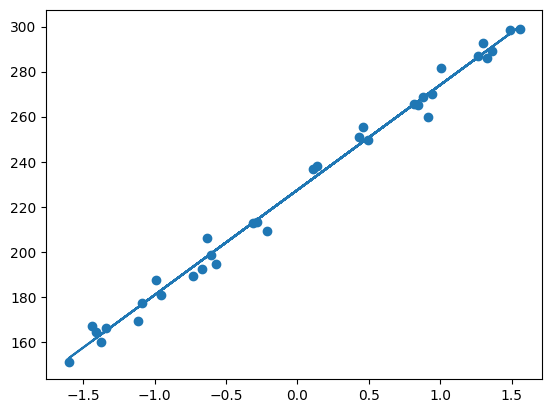

In [272]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regression.predict(X_train))

#### Prediction of Test Data
#### 1.predicted height output = intercept_ + coef_(Weights)
#### 2. y_pred_test = `mx + c` => 19.03(X_test) + 165.27

### My model is now trained and ready for evaluation. It uses a simple linear regression approach to predict the dependent variable based on the independent variable.

In [273]:
y_pred = regression.predict(X_test)
y_pred

array([215.86830355, 184.30000421, 292.53417338, 194.82277067,
       272.99189283, 294.03742573, 298.54718276, 185.80325657,
       187.30650893, 151.22845253, 158.74471428, 178.28699482])

## Performance Metrics : MSE, MAE, RMSE

In [274]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 1. **Mean Squared Error (MSE)**:
- **Value**: 15.7504  
- **Interpretation**:  
   - This measures the **average squared difference** between the actual (Y_test) and predicted values (\(Y_pred).
   - A smaller value indicates better performance, as it implies predictions are close to actual values.
   - In your case, \(15.75\) suggests that while the predictions aren't perfect, they are fairly close, considering the magnitude of \(Y_{\text{test}}\).
- **Limitation**: It heavily penalizes large errors due to squaring, making it sensitive to outliers.

In [275]:
mse = mean_squared_error(Y_test, y_pred)
print(mse)

15.750396059645288


### 2. **Mean Absolute Error (MAE)**:
- **Value**: 3.0941  
- **Interpretation**:
   - MAE measures the **average absolute difference** between the actual and predicted values.
   - Unlike MSE, it doesn’t square the errors, making it less sensitive to outliers.
   - In tis case, the average error between predictions and actual values is about \(3.09\).
- **Comparison with MSE**:
   - Since MAE \(< MSE\), there might be some larger errors that are inflating MSE more.

In [276]:
mae = mean_absolute_error(Y_test, y_pred)
print(mae)

3.094118053219681


### 3. **Root Mean Squared Error (RMSE)**:
- **Value**: 3.9687  
- **Interpretation**:
   - RMSE is the square root of MSE and represents the error **on the same scale as the target variable**.
   - In this case, the average prediction error is about \(3.97\).
   - RMSE is often preferred in real-world cases because it has the same units as the output.

In [277]:
rmse = np.sqrt(mse)
print(rmse)

3.96867686510823


### 4. **R-squared (R²)**:
- **Value**: 0.9945  
- **Interpretation**:
   - This metric tells you how much of the variance in \(Y_{\text{test}}\) is explained by your model.
   - A score close to 1 (e.g., \(0.9945\)) indicates your model explains \(99.45\%\) of the variance, meaning it fits the data very well.
   - However, a high \(R^2\) doesn't necessarily mean the model generalizes well—it could be overfitting. Cross-validation or separate test data would confirm this.


In [278]:
from sklearn.metrics import r2_score

In [279]:
score= r2_score(Y_test, y_pred)
print(score)

0.9944946270202608


### 5. Adjusted \( R^2 \):
1. **Adjusted \( R^2 \)** compensates for the number of predictors (\( p \)) added to the model. While \( R^2 \) always increases as you add variables (regardless of their significance), **Adjusted \( R^2 \)** penalizes the addition of non-significant predictors, making it more robust for evaluating models.
   
2. **Value of 0.9939**:
   - This indicates that approximately \( 99.39\% \) of the variability in the dependent variable (\( Y_{\text{test}} \)) is explained by the independent variables (\( X_{\text{test}} \)), adjusting for the number of predictors.
   - The small difference between \( R^2 \) and Adjusted \( R^2 \) (\( 0.994 - 0.9939 \approx 0.0001 \)) suggests that the predictors used in your model are meaningful and contribute effectively to explaining \( Y_{\text{test}} \).

3. **Takeaway** for interviews:
   - Use **Adjusted \( R^2 \)** when comparing models with different numbers of predictors to ensure fairness in evaluation.
   - A very close Adjusted \( R^2 \) to \( R^2 \) is a good indicator that your model isn't overfitting by adding unnecessary predictors.



In [280]:
1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.9939440897222869

## OLS Linear Regression

### Linear regression is used for prediction, while OLS provides deeper insights into model performance and statistical significance. Both approaches confirm the relationship between \(X\) and \(Y\) but serve slightly different purposes. OLS is preferred for optimization during training since squaring errors emphasizes minimizing large deviations. OLS helps train the model to fit the overall data by minimizing squared errors.

### **Comparison Between Linear Regression and OLS**

| **Aspect**               | **Linear Regression**                           | **OLS Model**                                         |
|---------------------------|------------------------------------------------|------------------------------------------------------|
| **Objective**            | Minimizes residuals (errors)                   | Minimizes the sum of squared residuals               |
| **Implementation**       | Uses numerical optimization techniques         | Based on a closed-form equation                     |
| **Outputs**              | Coefficients and intercept                     | Detailed statistical summary (coefficients, R², p-values, etc.) |
| **Interpretability**     | Predictive focus                               | Analytical focus (model diagnostics)                |

---


In [281]:
import statsmodels.api as sm

In [282]:
model = sm.OLS(Y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[-11.58388575 -43.1521851   65.08198407 -32.62941863  45.53970352
  66.58523643  71.09499346 -41.64893274 -40.14568038 -76.22373678
 -68.70747503 -49.16519448]


#### **Interpretation**:  
- Both methods (Linear Regression and OLS) yield the same **coefficient** (\(46.70130606\)), confirming the slope consistency.
- **OLS summary** provides additional statistical details (e.g., p-values, confidence intervals), helping evaluate the reliability of the coefficient and model fit.

In [283]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              1.391
Date:                Sun, 12 Jan 2025   Prob (F-statistic):                       0.247
Time:                        16:30:59   Log-Likelihood:                         -232.77
No. Observations:                  34   AIC:                                      467.5
Df Residuals:                      33   BIC:                                      469.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Prediction for new data
#### So, this is basically performing to get the best fit line using the coeff = 46.7013 and intercept = 227.45 i,e
#### `y(predicted) = mx + c ` Where, `x` = weight, `m` = coefficient, `c` = inercept
#### `y(predicted height) = (46.7013 * 72 + 227.45)`
#### Result = `3589.94622548`
#### Transform the data as initially we performed standardization and we will get the `Predicted height = 230.60017658`

In [284]:
regression.predict([[72]])

array([3589.94622548])

In [285]:
# we are using scaler.transform here becuase we performed standardizatin on the weight feature before the model training.
regression.predict(scaler.transform([[72]]))

C:\Users\lalra\myFolder\Software-Engineering\AIML\IITG\IITG-conda-env\iitgAIMLVenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([230.60017658])